# Data 606 EDA

Debanjan Chowdhury

Max Grody

Jagan Sirigiri

## Data Loading & Information

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

### Loading our dataset from csv to dataframe

In [2]:
df= pd.read_csv('data/merged_music_dataset_of_00s_10s.csv')


In [3]:
df.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.1250,0.631,112.098,193760,4,22.62384,10,1
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.26800,0.1360,0.969,135.347,192720,4,28.29051,10,0
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.00000,0.3210,0.290,77.250,89427,4,45.77202,4,0
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.00000,0.1930,0.746,124.711,239240,4,35.59732,10,1
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.00000,0.0759,0.389,153.105,253640,4,19.65701,11,1
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.00000,0.1150,0.344,124.213,314286,3,32.66343,16,0


## EDA

We have 12270 rows and 19 columns

In [4]:
df.shape

(12270, 19)

In [5]:
#how many rows in dataset

number_of_rows = len(df.index)
print(number_of_rows)

12270


In [6]:
#number of unique tracks
len(df['track'].unique())

#The output is 11240 ,expecting 12270 rows based on rows in csv
#need to investigate why less tracks,duplicate tracks present?

11240

In [7]:
#number of unique tracks
len(df['artist'].unique())


5873

There are no null values in the dataset

In [8]:
##take a look at null count in each column to make a decision to drop any column with many values
#there seems to be no nulls in any column values which is good - no need to prune any column
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [9]:
pd.set_option('display.max_columns', None)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [10]:
df.head(20)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.268000,0.1360,0.969,135.347,192720,4,28.29051,10,0
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.000000,0.3210,0.290,77.250,89427,4,45.77202,4,0
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.000000,0.1930,0.746,124.711,239240,4,35.59732,10,1
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,153.105,253640,4,19.65701,11,1
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,124.213,314286,3,32.66343,16,0


In [11]:
#take a look at data types of each column before making any conversion of a feature/column data type
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [12]:
#convert the data type of 'track' and artist features from 'object' to string
df['track'] = df['track'].astype(str)
df['artist'] = df['artist'].astype(str)


### Below is a count plot fot the top 20 tracks with highest count

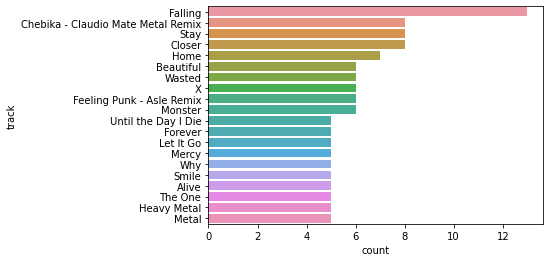

In [13]:
sns.countplot(y="track", data=df,
              order=df.track.value_counts().iloc[:20].index)

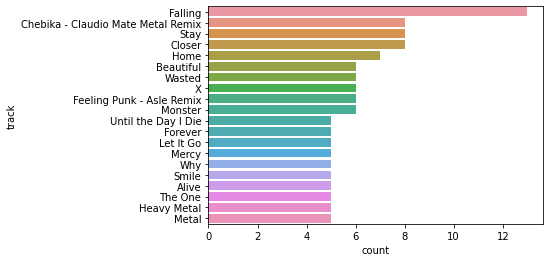

In [14]:
sns.countplot(y="track", data=df,
              order=df.track.value_counts().iloc[:20].index)
#the graph indicates ther are duplicate tracks

### Countplot of each of the Target variables

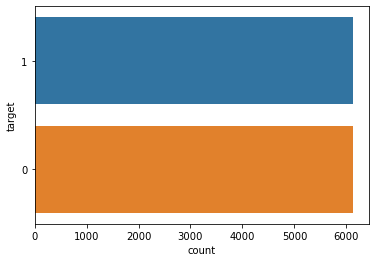

In [15]:
#the target column is nothing but popularity/hit feature with values of 0 or 1 indicateing flop or hit
sns.countplot(y="target", data=df,
              order=df.target.value_counts().iloc[:20].index)
#the output graph indicates there are almost equal hits and flops and hence is an even data set

### Distribution Plot for each of the features in the dataset. 

C:\Users\deban\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


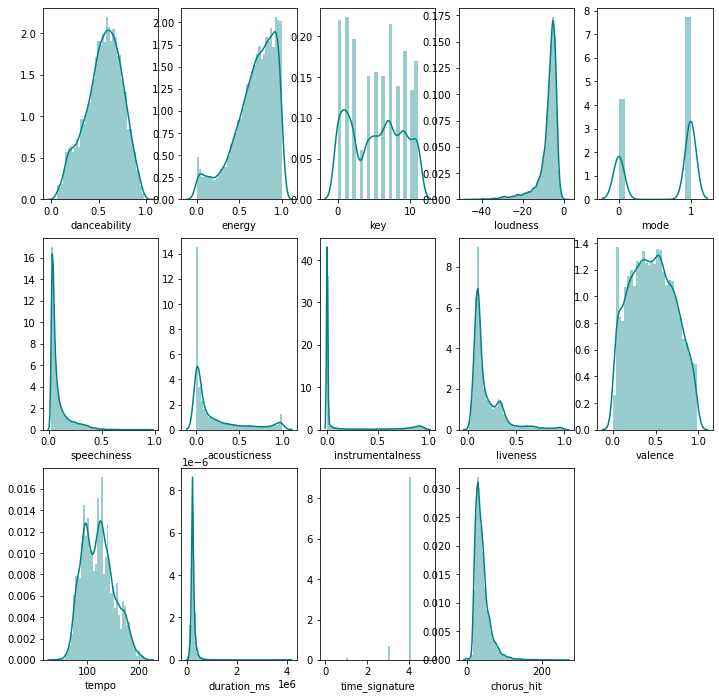

In [16]:
#Lets have a look at distribution based on acoustic features using histograms

f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( df["danceability"] , color="teal", ax=axes[0, 0])
sns.distplot( df["energy"] , color="teal", ax=axes[0, 1])
sns.distplot( df["key"] , color="teal", ax=axes[0, 2])
sns.distplot( df["loudness"] , color="teal", ax=axes[0, 3])
sns.distplot( df["mode"] , color="teal", ax=axes[0, 4])
sns.distplot( df["speechiness"] , color="teal", ax=axes[1, 0])
sns.distplot( df["acousticness"] , color="teal", ax=axes[1, 1])
sns.distplot( df["instrumentalness"] , color="teal", ax=axes[1, 2])
sns.distplot( df["liveness"] , color="teal", ax=axes[1, 3])
sns.distplot( df["valence"] , color="teal", ax=axes[1, 4])
sns.distplot( df["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( df["duration_ms"] , color="teal", ax=axes[2, 1])
sns.distplot( df["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( df["chorus_hit"] , color="teal", ax=axes[2, 3])

f.delaxes(axes[2][4])
plt.show()

As we can see on the distribution plots above some values seem to have categorical variables with outliers like the time signature value of 4 is significantly higher. Also, for liveliness a significantly higher range is closer to 0 and also instrumentalness the value closer to 0 is much higher in existence than the others.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A393201C10>,
      dtype=object)

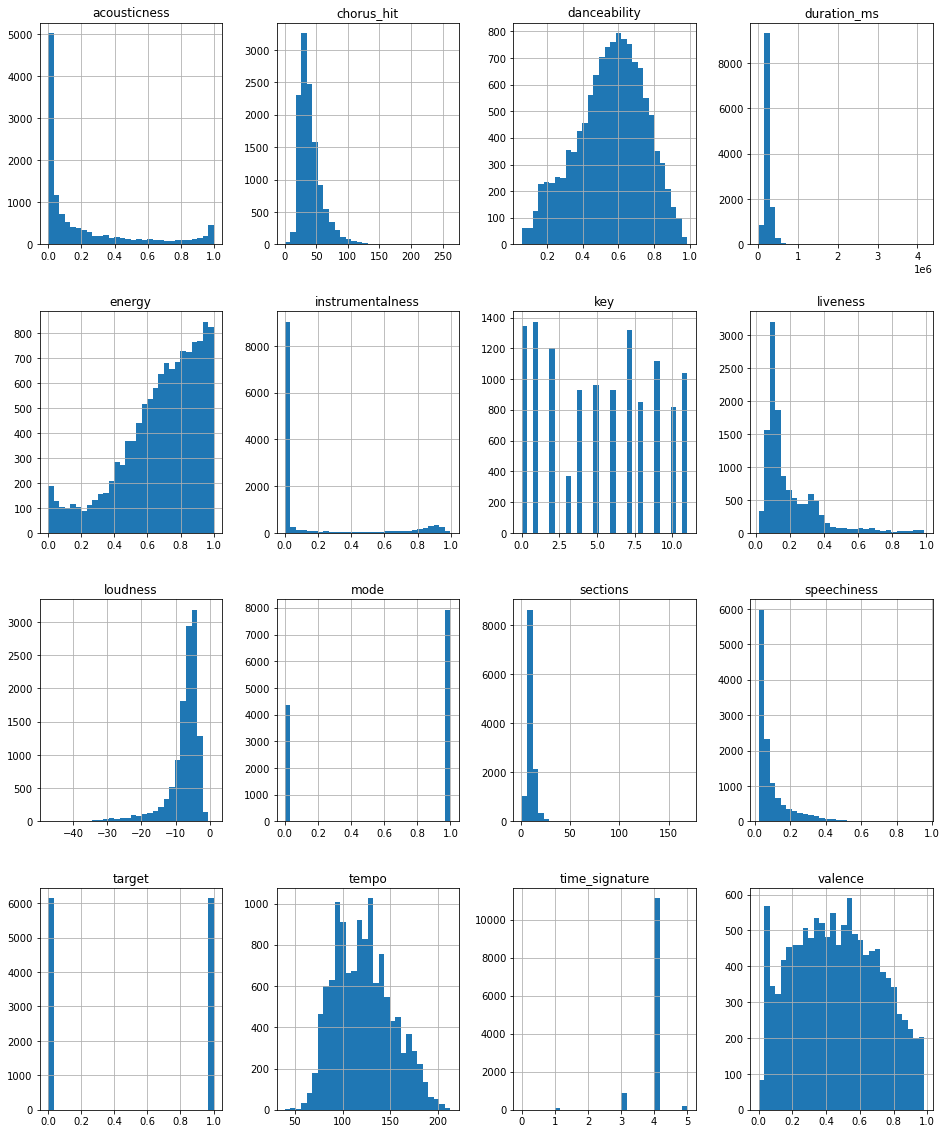

In [17]:
df.hist(figsize=(16,20), bins=30)

#### Heatmap to evaluate the corelation between each of the columns in the dataset.

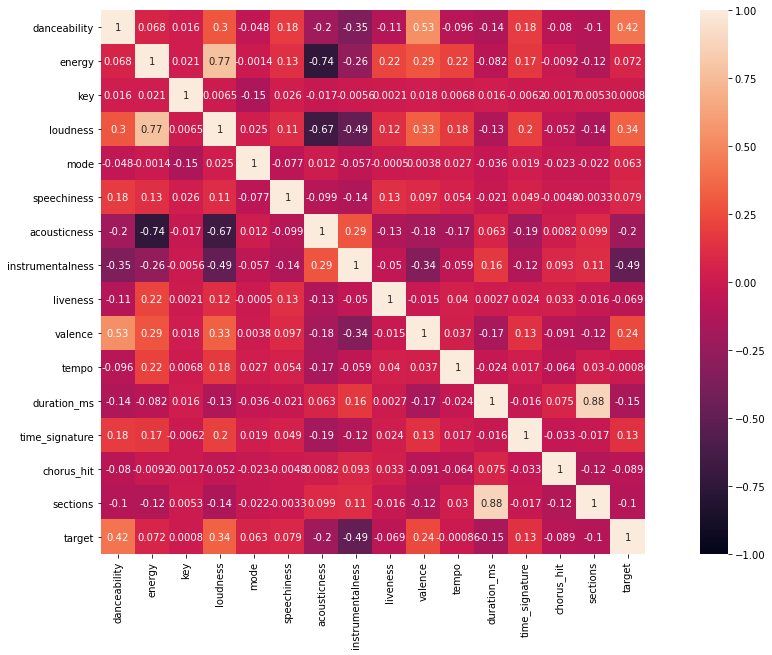

In [18]:
corrmat = df.corr()
fig = plt.figure(figsize = (20, 10))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

### Average duration in milliseconds for each track

##### All tracks in the order of average danceability

In [19]:
duration_df = df[["track", "duration_ms"]].groupby('track').agg(
    Mean_duration=pd.NamedAgg("duration_ms", "mean") 
)
duration_df = duration_df.reset_index()
duration_df = duration_df.head(40)

In [20]:
duration_df["track"] = duration_df["track"].str.replace('\$\$','\\$\\$')

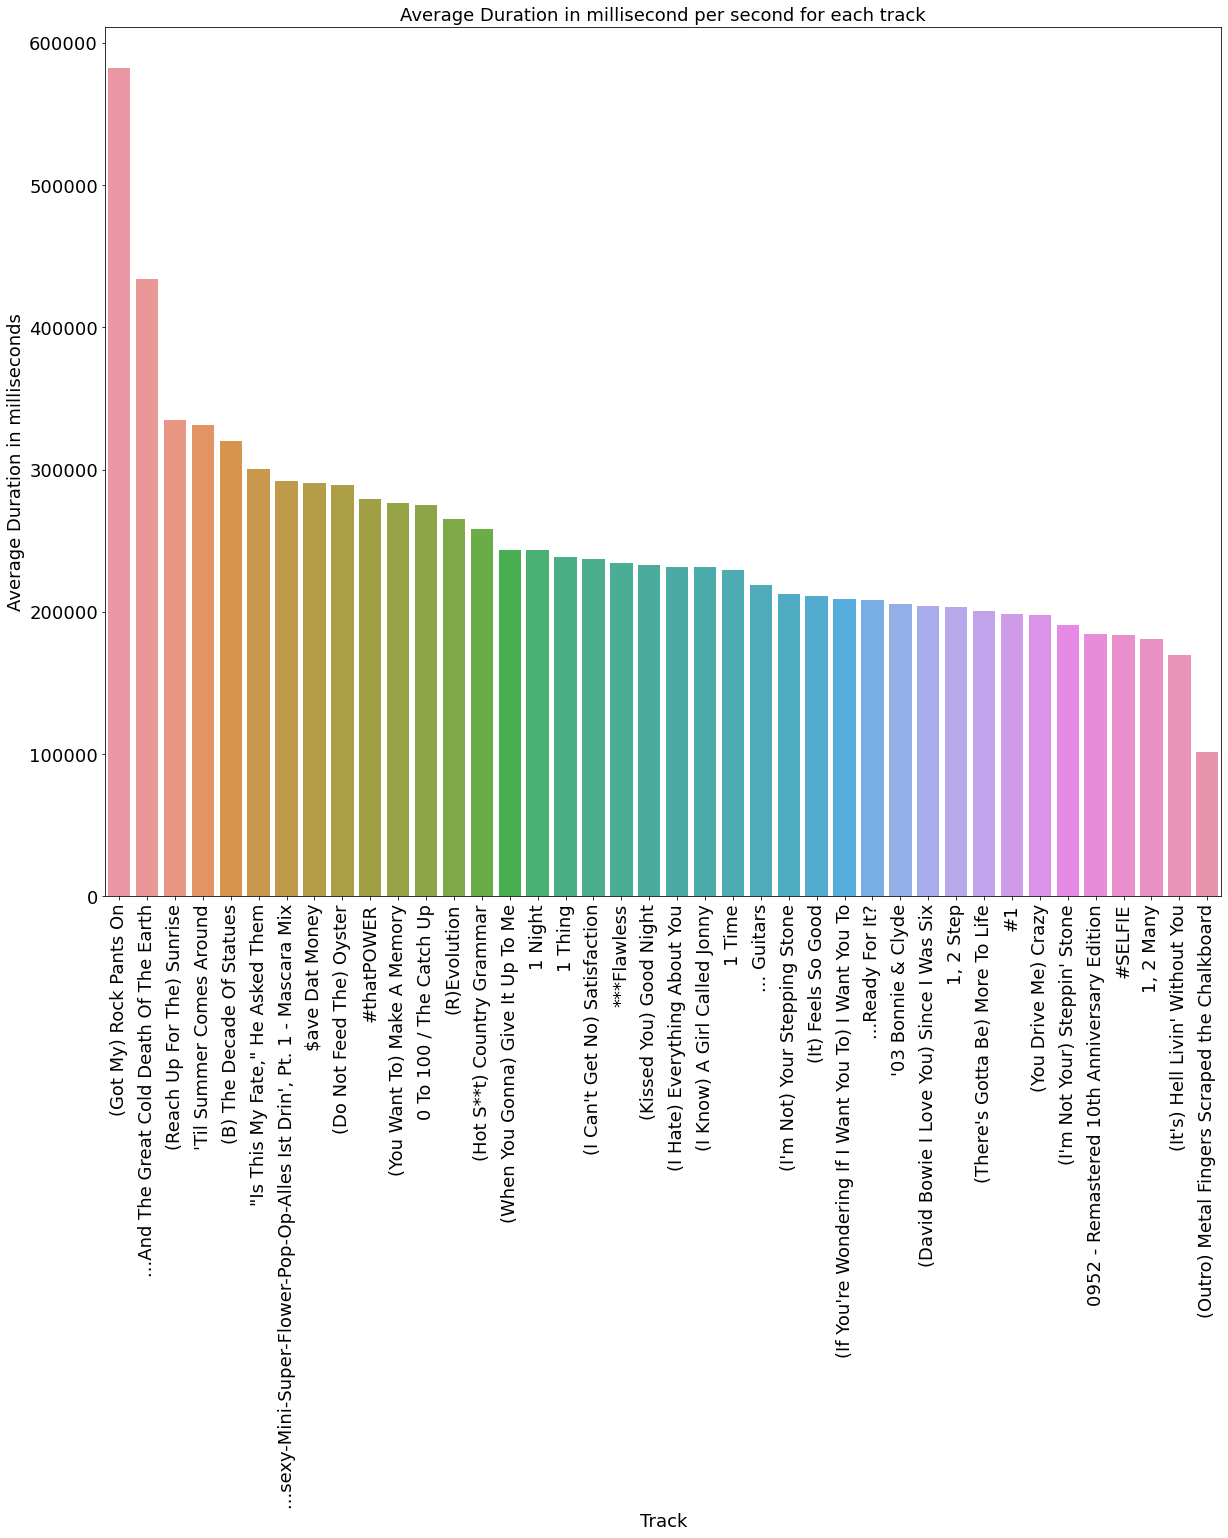

In [30]:
plt.figure(figsize=(20,16))
# make barplot and sort bars in descending order
sns.barplot(x='track', 
            y="Mean_duration", 
            data=duration_df, 
            order=duration_df.sort_values('Mean_duration', ascending = False).track)
# set labels
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Track", size=18)
plt.ylabel("Average Duration in milliseconds", size=18)
plt.title("Average Duration in millisecond per second for each track", size=18)
plt.savefig('duration_ms.png')

### Top 20 tracks in order of danceability

In [22]:
df["track"] = df["track"].str.replace('\$\$','\\$\\$')

In [23]:
danceability_df = df.head(20)

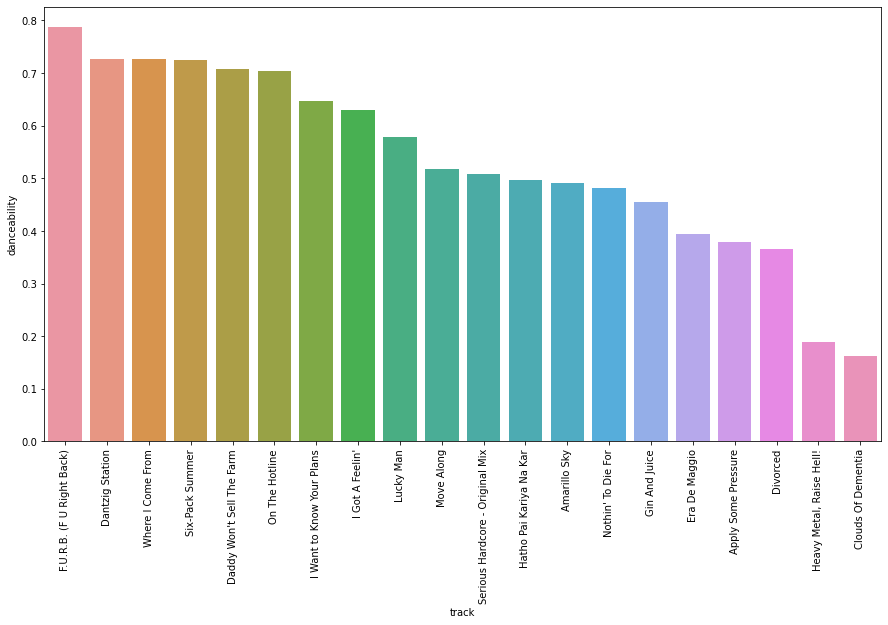

In [24]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='track', 
            y="danceability", 
            data=danceability_df,
           order=danceability_df.sort_values('danceability', ascending = False).track)
plt.savefig('danceability.png')

### Top 20 tracks based on the highest chosrus hit.

The chosurs hit duration is the amount of time it takes in the track before the chorus starts singing. 

In [25]:
chorus_hit_df = df.head(20)

In [26]:
chorus_hit_df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.268000,0.1360,0.969,135.347,192720,4,28.29051,10,0
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.000000,0.3210,0.290,77.250,89427,4,45.77202,4,0
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.000000,0.1930,0.746,124.711,239240,4,35.59732,10,1
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,153.105,253640,4,19.65701,11,1
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,124.213,314286,3,32.66343,16,0


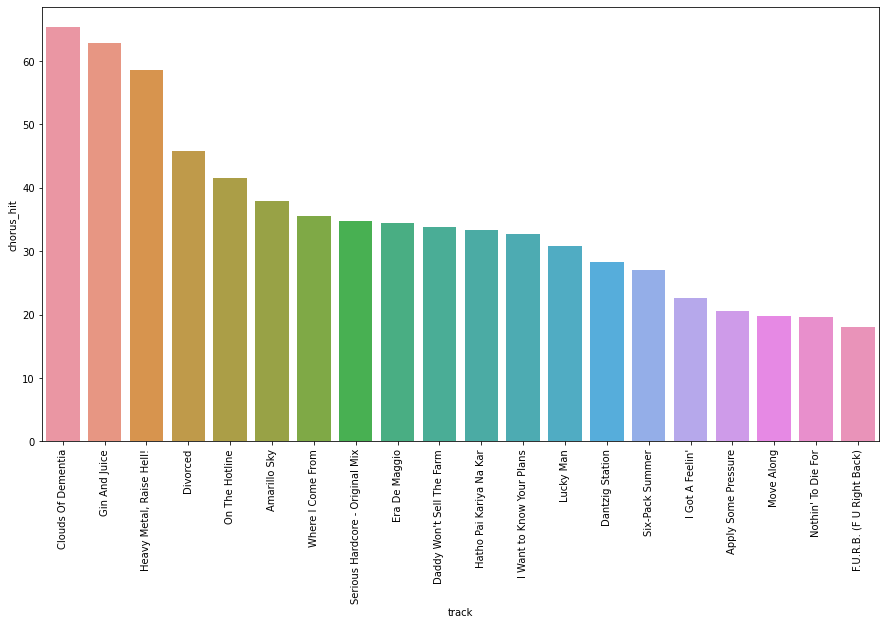

In [27]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='track', 
            y="chorus_hit", 
            data=chorus_hit_df,
           order=chorus_hit_df.sort_values('chorus_hit', ascending = False).track)
plt.savefig('chorus_hit.png')

### Scatterplot showing the duration for the tracks

It seems that the songs that had a really small duration or songs with too much duration seem to not be a hit and the songs that are within 200K to 200K are hit songs

In [28]:
Duration_df = df.head(100)

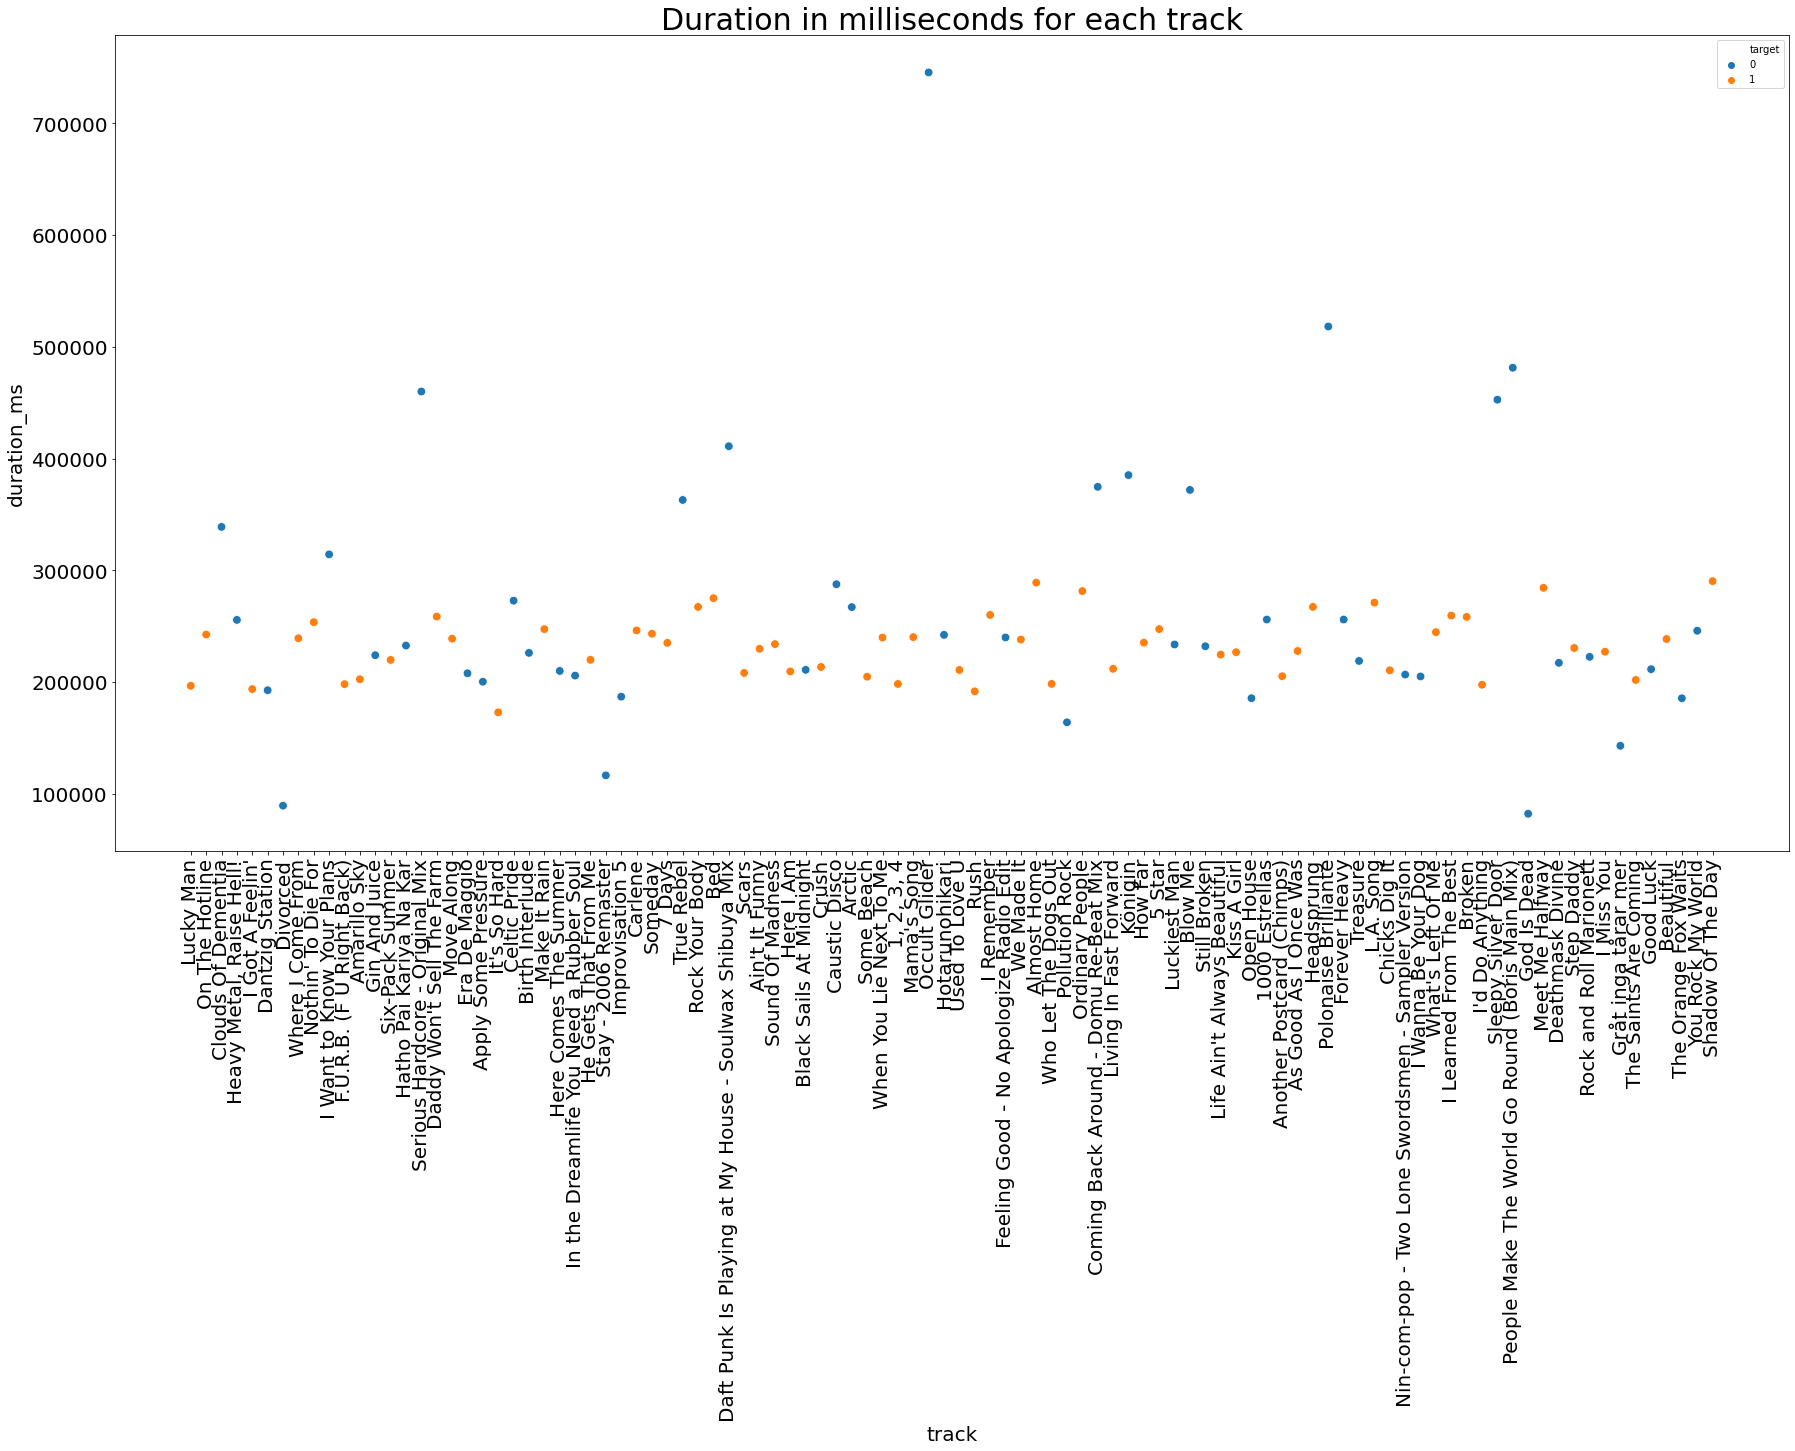

In [31]:
fig, ax = plt.subplots(figsize=(30, 15))


sns.scatterplot(data=Duration_df, x="track", y="duration_ms", s=75, hue="target",
sizes=40)
plt.xticks(rotation=90)
ax.set_title("Duration in milliseconds for each track", fontsize=30)
ax.set_xlabel("track", fontsize=20)
ax.set_ylabel("duration_ms", fontsize=20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.savefig('duration_ms_scatter.png')